In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

### 讀取檔案

In [2]:
df_banana = pd.read_csv("../analysis data/台北一市場分析資料210722.csv")
df_banana

,日期,市場,產品,香蕉_平均價,香蕉_交易量,香蕉_5日平均價格,香蕉_前1日平均價格,芭蕉_前1日平均價,芭樂_前1日平均價格
0,2011-01-01,109 台北一,A1 香蕉,26.9,15779,29.5,26.9,39.0,43.4
1,2011-01-02,109 台北一,A1 香蕉,28.9,17462,29.5,26.9,39.0,43.4
2,2011-01-04,109 台北一,A1 香蕉,30.7,19405,29.5,28.9,47.0,48.2
3,2011-01-05,109 台北一,A1 香蕉,31.0,22050,29.5,30.7,40.1,43.6
4,2011-01-06,109 台北一,A1 香蕉,30.2,15062,29.5,31.0,40.0,44.4
...,...,...,...,...,...,...,...,...,...
3140,2021-06-10,109 台北一,A1 香蕉,25.8,18943,24.1,23.5,37.9,29.8
3141,2021-06-11,109 台北一,A1 香蕉,25.1,18309,24.4,25.8,33.6,25.9
3142,2021-06-12,109 台北一,A1 香蕉,25.3,15720,24.8,25.1,31.6,23.0
3143,2021-06-13,109 台北一,A1 香蕉,26.1,15004,25.2,25.3,35.6,23.1


In [3]:
df_banana.columns = ["date", "market", "product", "B_avg_price", "B_volume", "B_avg_price(5d)", "B_avg_price(-1d)", "SB_avg_price(-1d)", "G_avg_price(-1d)"]
df_banana

,date,market,product,B_avg_price,B_volume,B_avg_price(5d),B_avg_price(-1d),SB_avg_price(-1d),G_avg_price(-1d)
0,2011-01-01,109 台北一,A1 香蕉,26.9,15779,29.5,26.9,39.0,43.4
1,2011-01-02,109 台北一,A1 香蕉,28.9,17462,29.5,26.9,39.0,43.4
2,2011-01-04,109 台北一,A1 香蕉,30.7,19405,29.5,28.9,47.0,48.2
3,2011-01-05,109 台北一,A1 香蕉,31.0,22050,29.5,30.7,40.1,43.6
4,2011-01-06,109 台北一,A1 香蕉,30.2,15062,29.5,31.0,40.0,44.4
...,...,...,...,...,...,...,...,...,...
3140,2021-06-10,109 台北一,A1 香蕉,25.8,18943,24.1,23.5,37.9,29.8
3141,2021-06-11,109 台北一,A1 香蕉,25.1,18309,24.4,25.8,33.6,25.9
3142,2021-06-12,109 台北一,A1 香蕉,25.3,15720,24.8,25.1,31.6,23.0
3143,2021-06-13,109 台北一,A1 香蕉,26.1,15004,25.2,25.3,35.6,23.1


### 數值型資料（Numerical data distribution）

In [4]:
df_num = df_banana.select_dtypes(include=["int64", "float64"])
df_num

,B_avg_price,B_volume,B_avg_price(5d),B_avg_price(-1d),SB_avg_price(-1d),G_avg_price(-1d)
0,26.9,15779,29.5,26.9,39.0,43.4
1,28.9,17462,29.5,26.9,39.0,43.4
2,30.7,19405,29.5,28.9,47.0,48.2
3,31.0,22050,29.5,30.7,40.1,43.6
4,30.2,15062,29.5,31.0,40.0,44.4
...,...,...,...,...,...,...
3140,25.8,18943,24.1,23.5,37.9,29.8
3141,25.1,18309,24.4,25.8,33.6,25.9
3142,25.3,15720,24.8,25.1,31.6,23.0
3143,26.1,15004,25.2,25.3,35.6,23.1


In [5]:
# 變換欄位順序 => 把average price拉出來放在最後一欄
col_target = list(df_num["B_avg_price"])
df_num.drop(columns="B_avg_price", inplace=True)
df_num.insert(5, "B_avg_price", col_target)

C:\Users\Tibame\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df_num.head()

,B_volume,B_avg_price(5d),B_avg_price(-1d),SB_avg_price(-1d),G_avg_price(-1d),B_avg_price
0,15779,29.5,26.9,39.0,43.4,26.9
1,17462,29.5,26.9,39.0,43.4,28.9
2,19405,29.5,28.9,47.0,48.2,30.7
3,22050,29.5,30.7,40.1,43.6,31.0
4,15062,29.5,31.0,40.0,44.4,30.2


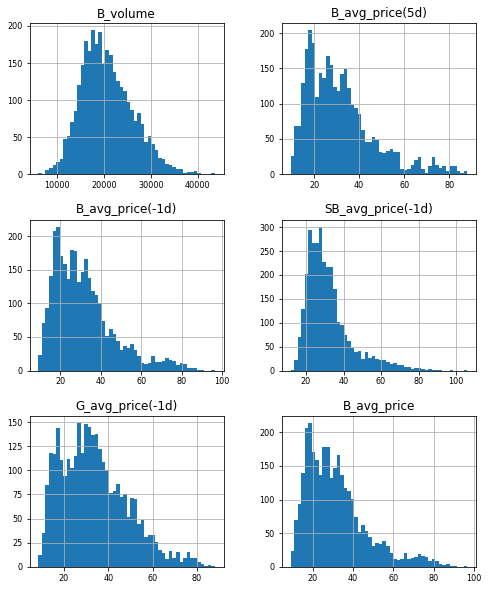

In [7]:
df_num.hist(figsize=(8,10), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
df_num_corr = df_num.corr()["B_avg_price"][:-1]
# df_num_corr

golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
golden_features_list

B_avg_price(-1d)     0.991747
B_avg_price(5d)      0.989506
SB_avg_price(-1d)    0.851793
G_avg_price(-1d)     0.414876
B_volume            -0.461871
Name: B_avg_price, dtype: float64

#### 相關係數（Correlation）

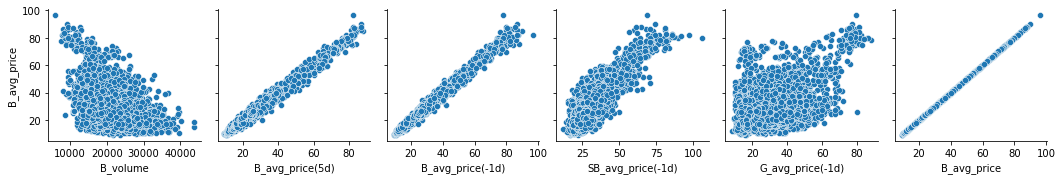

In [9]:
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+6],
                 y_vars=['B_avg_price'], diag_kind = None)

### Feature to feature relationship

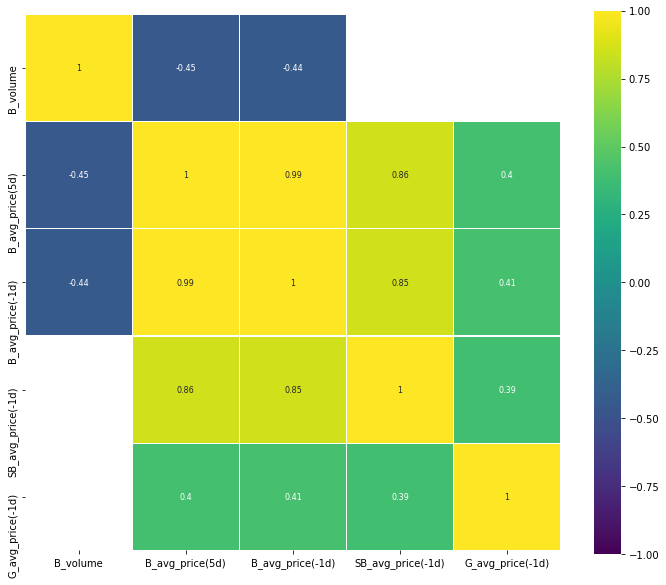

In [10]:
corr = df_num.drop('B_avg_price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);